### Loading the required libraries

In [1]:
import pandas as pd
import numpy as np
import scipy 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [2]:
df = pd.read_csv("USA_Housing.csv", sep = ",", encoding = "Latin-1")
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


### Exploring the dataset

In [3]:
## getting more detailed infomation about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
## checking the shape of the dataframe
df.shape

(5000, 7)

In [5]:
## checking the summary statistics of the dataset
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [10]:
from scipy.stats import describe

data = df.drop(columns = ["Address"])

description_stats = describe(data)
print(description_stats)

DescribeResult(nobs=5000, minmax=(array([1.77966312e+04, 2.64430419e+00, 3.23619402e+00, 2.00000000e+00,
       1.72610686e+02, 1.59386579e+04]), array([1.07701748e+05, 9.51908807e+00, 1.07595883e+01, 6.50000000e+00,
       6.96217134e+04, 2.46906559e+06])), mean=array([6.85831090e+04, 5.97722204e+00, 6.98779185e+00, 3.98133000e+00,
       3.61635160e+04, 1.23207265e+06]), variance=array([1.13592777e+08, 9.82985357e-01, 1.01170049e+00, 1.52309479e+00,
       9.85185302e+07, 1.24692058e+11]), skewness=array([-0.03370986, -0.00721171, -0.04098361,  0.37612752,  0.05063449,
       -0.00271725]), kurtosis=array([ 0.0443285 , -0.08455365, -0.0757773 , -0.70206396, -0.00792595,
       -0.05606297]))


### Cleaning the dataset

In [11]:
## checking for any null values

df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [12]:
## checking for any duplicates

df.duplicated().sum()

0

### Visualizing the dataset

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 700x700 with 0 Axes>

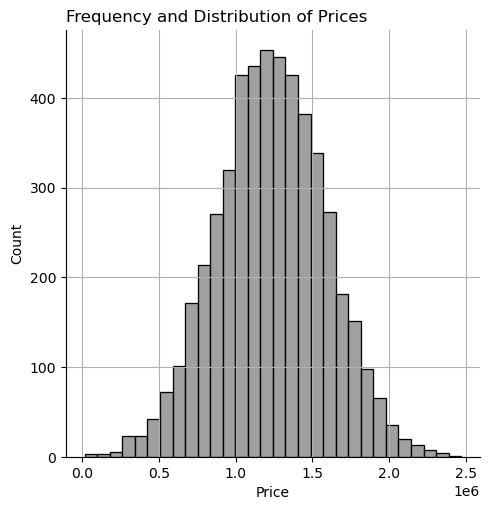

In [13]:
## checking the distribution of the prices

plt.figure(figsize = (7,7))
sns.displot(data["Price"], color = "grey", bins = 30)
plt.xlabel("Price")
plt.ylabel("Count")
plt.grid(True)
plt.title("Frequency and Distribution of Prices", loc = "left")
plt.show()

##### The prices have a normal distribution

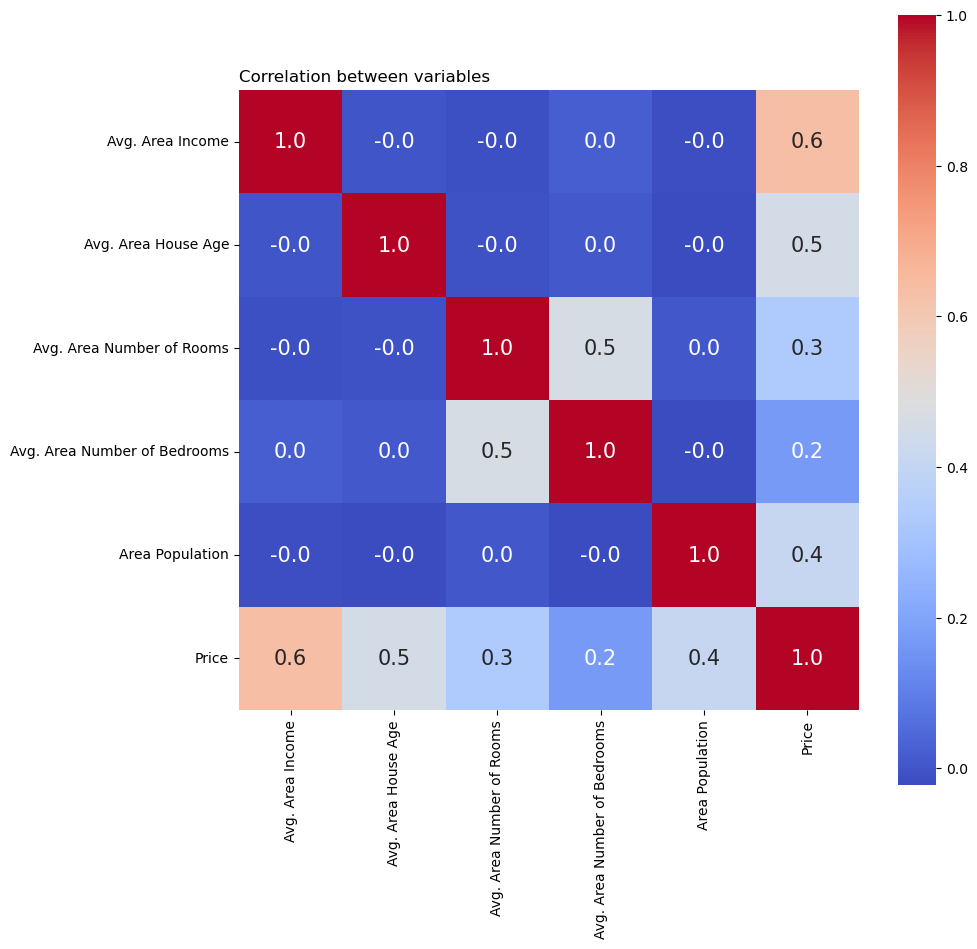

In [14]:
## Visualizing the correlations of all variables

correlation = data.corr()

plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt=".1f", annot=True, annot_kws={"size": 15}, cmap = "coolwarm")
plt.title("Correlation between variables", loc = "left")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 700x700 with 0 Axes>

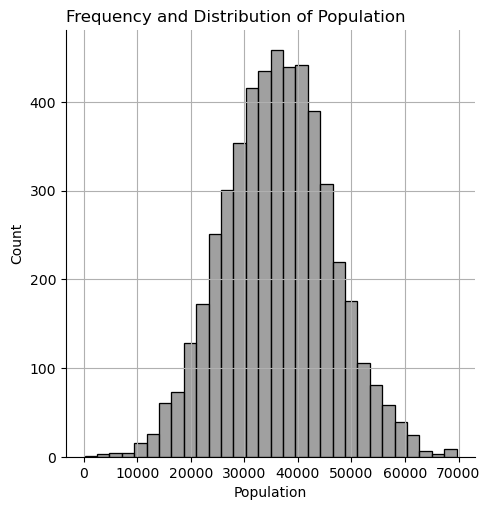

In [15]:
## Distribution of the population

plt.figure(figsize = (7,7))
sns.displot(data["Area Population"], color = "grey", bins = 30)
plt.xlabel("Population")
plt.ylabel("Count")
plt.grid(True)
plt.title("Frequency and Distribution of Population", loc = "left")
plt.show()

### Building the Prediction Models

#### 1. Linear Regression Model

In [16]:
## Defining the dependent and Independent Variables

X = data.drop(columns = ["Price"])
y = data["Price"]

In [17]:
## dividing the data into training and testing samples

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 100)

In [18]:
## Loading the linear regression fucntion 

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [19]:
## fitting the model onto the training datasets

lr.fit(X_train, y_train)

LinearRegression()

In [20]:
## printing the intercepts

print(lr.intercept_)

-2636977.6643384118


In [21]:
## printing the coefficients

coefficients = pd.DataFrame([X_train.columns, lr.coef_]).T
coefficients = coefficients.rename(columns = {0 : "Attribute", 1 : "Coefficients"})
coefficients

,Attribute,Coefficients
0,Avg. Area Income,21.515931
1,Avg. Area House Age,166184.709827
2,Avg. Area Number of Rooms,120852.021418
3,Avg. Area Number of Bedrooms,974.511451
4,Area Population,15.28171


In [23]:
## predicting the model

pred = lr.predict(X_test)
pred

array([ 814187.21740546, 1562316.79938461, 1322982.71675598, ...,
        972197.98982223, 1058100.65452609, 1355905.01676256])

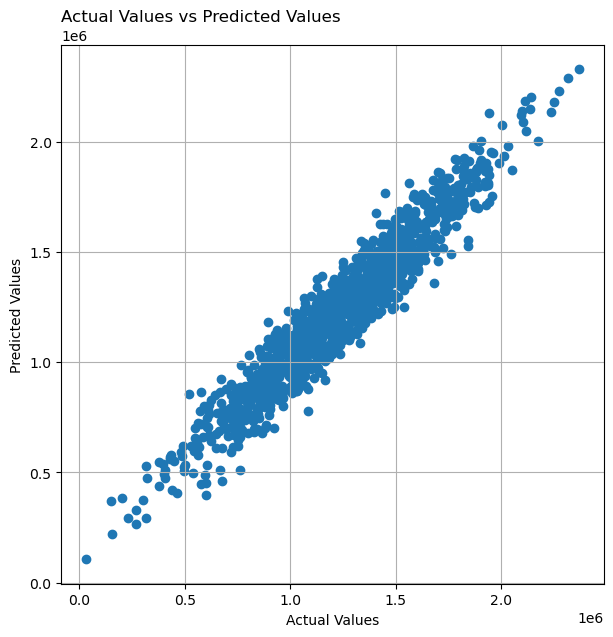

In [24]:
## plotting the results

plt.figure(figsize = (7,7))
plt.scatter(y_test, pred, marker = "o")
plt.grid(True)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual Values vs Predicted Values", loc = "left")
plt.show()

In [25]:
## Linear Regression metrics 

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_poisson_deviance


print("MAE:" , mean_absolute_error(y_test, pred))
print("MSE:" , mean_squared_error(y_test, pred))
print("RMSE" , np.sqrt(mean_squared_error(y_test, pred)))
print("Poission Deviance:", mean_poisson_deviance(y_test, pred))
print("R-Squared Value:" , r2_score(y_test, pred))
print("Adjusted R-Squared Value:", 1 - (1- r2_score(y_test, pred)) * len(y_train - 1) / (len(y_train)-X_train.shape[1]-1))

MAE: 81294.52682960127
MSE: 10244043999.594715
RMSE 101212.86479294376
Poission Deviance: 9529.61171693858
R-Squared Value: 0.919826820629094
Adjusted R-Squared Value: 0.9196983379698458


In [26]:
## Checking if the model is overfitting

y_test_pred = lr.predict(X_test)

In [27]:
## model evaluation for overfitting using the X-test data

print("MAE:" , mean_absolute_error(y_test, y_test_pred))
print("MSE:" , mean_squared_error(y_test, y_test_pred))
print("RMSE" , np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Poission Deviance:", mean_poisson_deviance(y_test, y_test_pred))
print("R-Squared Value:" , r2_score(y_test, y_test_pred))
print("Adjusted R-Squared Value:", 1 - (1- r2_score(y_test, y_test_pred)) * len(y_test - 1) / 
      (len(y_test)-X_test.shape[1]-1))

MAE: 81294.52682960127
MSE: 10244043999.594715
RMSE 101212.86479294376
Poission Deviance: 9529.61171693858
R-Squared Value: 0.919826820629094
Adjusted R-Squared Value: 0.9194401332687843


##### Conclusions: 
    1. The model evaluation scores are almost matching with that of the train data. Hence, the model is not over fitting.
    2. The model has an accuracy of 92% hence the model is a good predictor of the housing prices

#### 2. Random Forest Regressor

In [28]:
## Importing the random forest regressor 

from sklearn.ensemble import RandomForestRegressor

## creating a random forest regssor

reg = RandomForestRegressor()

In [29]:
## training the model using the datasets

reg.fit(X_train, y_train)

RandomForestRegressor()

In [30]:
## predicting the model 

y_predict = reg.predict(X_train)

In [31]:
## Model evaluation

print("MAE:" , mean_absolute_error(y_train, y_predict))
print("MSE:" , mean_squared_error(y_train, y_predict))
print("RMSE" , np.sqrt(mean_squared_error(y_train, y_predict)))
print("Poission Deviance:", mean_poisson_deviance(y_train, y_predict))
print("R-Squared Value:" , r2_score(y_train, y_predict))
print("Adjusted R-Squared Value:", 1 - (1- r2_score(y_train, y_predict)) * len(y_train - 1) / 
      (len(y_train)-X_train.shape[1]-1))

MAE: 35600.09825357698
MSE: 2052337831.5354726
RMSE 45302.73536482618
Poission Deviance: 1989.1548237558886
R-Squared Value: 0.983398273290231
Adjusted R-Squared Value: 0.9833716679589654


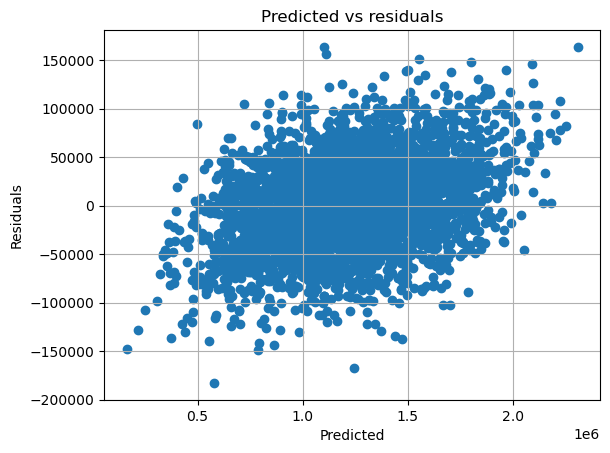

In [32]:
# Checking residuals

plt.scatter(y_predict,y_train-y_predict)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.grid()
plt.show()

In [33]:
## Checking if the model is overfitting using the test data

y_test_pred = reg.predict(X_test)

In [34]:
## Evaluating the model evaluations

print("MAE:" , mean_absolute_error(y_test, y_test_pred))
print("MSE:" , mean_squared_error(y_test, y_test_pred))
print("RMSE" , np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Poission Deviance:", mean_poisson_deviance(y_test, y_test_pred))
print("R-Squared Value:" , r2_score(y_test, y_test_pred))
print("Adjusted R-Squared Value:", 1 - (1- r2_score(y_test, y_test_pred)) * len(y_test - 1) / 
      (len(y_test)-X_test.shape[1]-1))

MAE: 97418.45484170756
MSE: 15164349771.781181
RMSE 123143.61441739959
Poission Deviance: 14570.541236502117
R-Squared Value: 0.8813189269448405
Adjusted R-Squared Value: 0.8807465101937706


##### Conclusions: 
    1.The model evaluation scores are slightly different from that of the train data, making the model to fairly predict the prices.
    2.The model has a 98% acuracy making it be a good predictor of pricing.
    3.In this case, the linear regression model is a better predictor of prices than the random forest regressor.

#### 3. SVM Regressor

In [35]:
#  Creating scaled set to be used in model to improve our results

## importing the standard scalar

from sklearn.preprocessing import StandardScaler

In [39]:
## creating the standard scalar

sc= StandardScaler()

In [40]:
## defining the training and testing datasets

x_train = sc.fit_transform(X_train)
x_test = sc.fit_transform(X_test)

In [41]:
## training the model

from sklearn import svm

## creating an svm regressor

rg = svm.SVR()

In [42]:
## Training/fitting the model using the training sets

rg.fit(x_train, y_train)

SVR()

In [43]:
## Model prediction on the training data

y_pred = rg.predict(x_train)

In [44]:
## Model evaluation 

print("MAE:" , mean_absolute_error(y_train, y_predict))
print("MSE:" , mean_squared_error(y_train, y_predict))
print("RMSE" , np.sqrt(mean_squared_error(y_train, y_predict)))
print("Poission Deviance:", mean_poisson_deviance(y_train, y_predict))
print("R-Squared Value:" , r2_score(y_train, y_predict))
print("Adjusted R-Squared Value:", 1 - (1- r2_score(y_train, y_predict)) * len(y_train - 1) / 
      (len(y_train)-X_train.shape[1]-1))

MAE: 35600.09825357698
MSE: 2052337831.5354726
RMSE 45302.73536482618
Poission Deviance: 1989.1548237558886
R-Squared Value: 0.983398273290231
Adjusted R-Squared Value: 0.9833716679589654


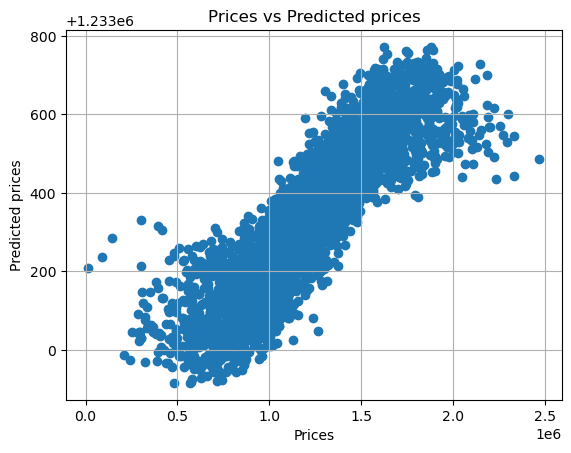

In [45]:
# Visualizing the differences between actual prices and predicted values

plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.grid(True)
plt.show()

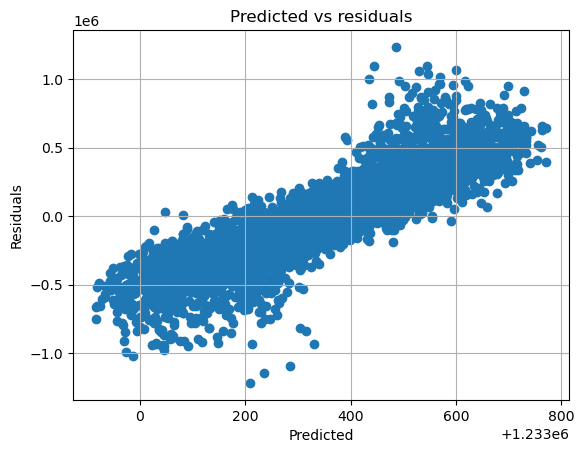

In [46]:
# Checking residuals

plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.grid()
plt.show()

In [47]:
# Predicting Test data with the model

y_test_pred = rg.predict(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


In [48]:
# Model Evaluation

print("MAE:" , mean_absolute_error(y_test, y_test_pred))
print("MSE:" , mean_squared_error(y_test, y_test_pred))
print("RMSE" , np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Poission Deviance:", mean_poisson_deviance(y_test, y_test_pred))
print("R-Squared Value:" , r2_score(y_test, y_test_pred))
print("Adjusted R-Squared Value:", 1 - (1- r2_score(y_test, y_test_pred)) * len(y_test - 1) / 
      (len(y_test)-X_test.shape[1]-1))

MAE: 286678.22999167076
MSE: 127809007276.47115
RMSE 357503.8563099301
Poission Deviance: 110024.60128820286
R-Squared Value: -0.000274351222948388
Adjusted R-Squared Value: -0.005098825585760025


##### Conclusion: 
    The model cannot be used as the model evaluation scores greately differe from the train data scores as the model is overfitting.

#### 4. XGBoost Regressor

In [49]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
reg_xb = XGBRegressor()

# Train the model using the training sets
reg_xb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [50]:
# Model prediction on train data

y_pred = reg.predict(X_train)

In [52]:
# Model Evaluation

print('R^2:',r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',mean_absolute_error(y_train, y_pred))
print('MSE:',mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred)))

R^2: 0.983398273290231
Adjusted R^2: 0.9833761021808429
MAE: 35600.09825357698
MSE: 2052337831.5354726
RMSE: 45302.73536482618


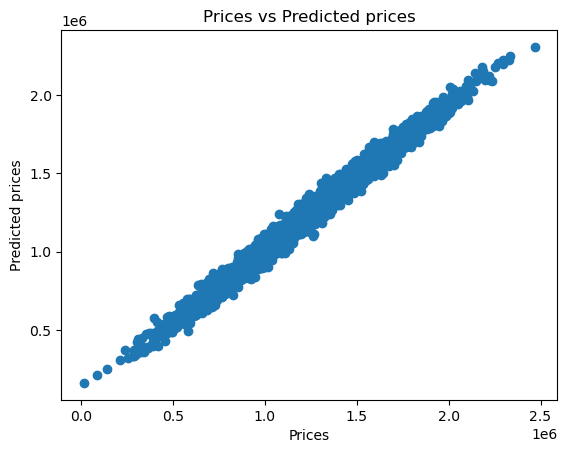

In [53]:
# Visualizing the differences between actual prices and predicted values

plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

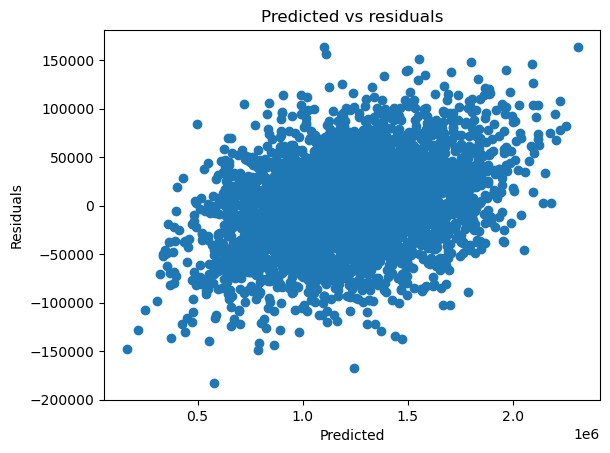

In [54]:
# Checking residuals

plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [55]:
#Predicting Test data with the model

y_test_pred = reg.predict(X_test)

In [57]:
# Model Evaluation

print('R^2:', r2_score(y_test, y_test_pred))
print('Adjusted R^2:',1 - (1-r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:', mean_absolute_error(y_test, y_test_pred))
print('MSE:', mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_test_pred)))

R^2: 0.8813189269448405
Adjusted R^2: 0.8808419129856155
MAE: 97418.45484170756
MSE: 15164349771.781181
RMSE: 123143.61441739959


##### Conclusion: 
    1.The model is a good predictor of the pricing with an accuracy of 98%.
    2.The model evaluation scores deviates from the train data model evaluation scores therefore it slightly overfits the model.

#### Overall conclusion:
    The Linear Regression model best predicts the model